# DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
# Load Dataset_B
dataB = np.load("Data/Dataset_B.npy")

# DBSCAN parameters
eps_values = [0.1, 0.3, 1]
min_samples_values = [3, 10, 30]

# Plotting function
def plot_dbscan(ax, X, eps, min_samples):
    dbscan_algo = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = dbscan_algo.labels_
    
    # Core samples mask
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan_algo.core_sample_indices_] = True

    # Number of clusters in labels
    unique_labels = set(labels)
    
    plt.figure(figsize=(6,6))
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black color is used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
            
        # Plotting core samples 
        # The noise/outliers are not going to be plotted in the final plot as asked in the question
        xy = X[class_member_mask & core_samples_mask]
        for point in xy:
            ax.plot(
                point[0], 
                point[1], 
                'o', 
                markerfacecolor=tuple(col),
                markeredgecolor='k', 
                markeredgewidth = 0.5,
                markersize=6
            )

    ax.set_title(f'eps={eps}, min_samples={min_samples}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')


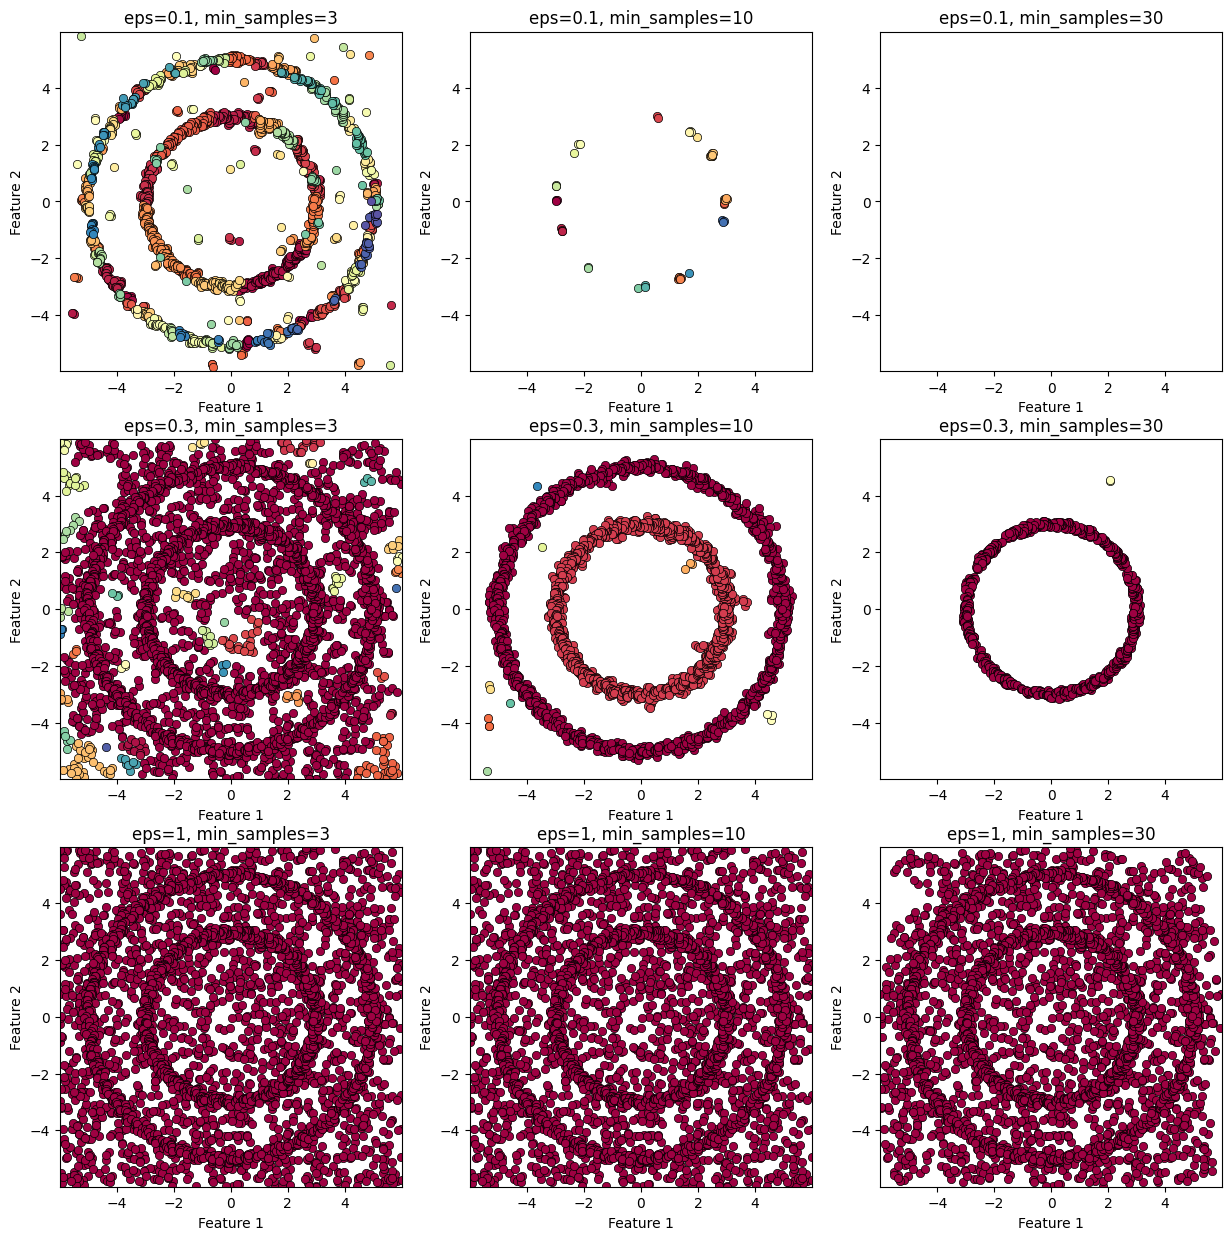

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [3]:
# Get the 9 plots here.
# Plotting

x_min, x_max = dataB[:, 0].min(), dataB[:, 0].max()
y_min, y_max = dataB[:, 1].min(), dataB[:, 1].max()

# Setting up the subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        ax = axes[i, j]
        plot_dbscan(ax, dataB, eps, min_samples)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

# Textwrite cell

### Observations and Explanations

1. **eps=0.1**
    - **min_samples=3**: The clusters are not well-defined, with many small, scattered clusters appearing. This is because a small eps value means only very close points are considered neighbors.
    - **min_samples=10**: Most points are considered noise, with only a few small clusters formed. Increasing min_samples requires more points to form a cluster, making it harder to find clusters with a small eps.
    - **min_samples=30**: No clusters are formed, and almost all points are considered noise. The combination of a small eps and a high min_samples makes clustering very restrictive.

2. **eps=0.3**
    - **min_samples=3**: The clustering is very noisy, with almost all points forming a single cluster. A moderate eps with a low min_samples includes many points in clusters, including points that may not be very close.
    - **min_samples=10**: The clusters start to form more clearly, with fewer noise points. The clustering now begins to capture the underlying structure of the data. This model predicts the best among other models. 
    - **min_samples=30**: The clusters are even more defined, closely resembling the true structure of the data. There are still some noise points, but the clusters are clear. But one of the cluster is completely ignored due to higher min_samples value.

3. **eps=1**
    - **min_samples=3**: The clustering is very noisy, with almost all points forming a single cluster. A large eps includes many points in clusters.
    - **min_samples=10**: The clustering is still very noisy, with almost all points forming a single cluster. A large eps includes many points in clusters. The high min_samples value still cannot compensate for the large eps.
    - **min_samples=30**: Similar to min_samples=10, most points form a single large cluster. The even higher min_samples value still cannot compensate for the large eps.

### Key Concept and the summary of the explanation

- **eps (Epsilon)**: Determines the maximum distance between two points for them to be considered as in the same neighborhood. A smaller eps results in smaller, more fine-grained clusters, while a larger eps includes more points in each cluster.
- **min_samples**: The minimum number of points required to form a dense region (i.e., a cluster). A lower value of min_samples results in more clusters, including noise and outliers, while a higher value requires more points to form a cluster, leading to fewer, larger clusters.